In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install('phyloseq')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.26), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'phyloseq'”
Old packages: 'ade4', 'ape', 'askpass', 'bit', 'bit64', 'bitops', 'broom',
  'bslib', 'cli', 'cluster', 'colorspace', 'curl', 'data.table', 'dbplyr',
  'digest', 'dtplyr', 'evaluate', 'fontawesome', 'forcats', 'fs', 'gargle',
  'generics', 'glue', 'googledrive', 'googlesheets4', 'haven', 'Hmisc',
  'igraph', 'jsonlite', 'knitr', 'lattice', 'lubridate', 'magrittr', 'mgcv',
  'mime', 'nlme', 'openssl', 'pbdZMQ', 'permute', 'pillar', 'pixmap',
  'processx', 'ps', 'purrr', 'R6', 'ragg', 'Rcpp', 'RCurl', 'readxl', 'reprex',
  'rhdf5', 'rhdf5filters', 'rlang', 'rmarkdown', 'rstudioapi', 'rvest

In [4]:
require(data.table)
require(dplyr)
require(tidyverse)
require(dada2)
require(phyloseq)
require(genefilter)
require(ggplot2)
require(vegan)
require(RColorBrewer)
require(metacoder)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   4.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::l

instead do rds files of otu 

In [5]:
ps<-readRDS(file = "/work/pi_sarah_gignouxwolfsohn_uml_edu/caroline/RDS/ps.rds")

In [6]:
#removing any taxa that don't show up in any samples to speed up the process
ps <- prune_taxa(taxa_sums(ps) > 0, ps)

In [14]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]

In [7]:
#normalizing ps by converting rawcounts into relative abundances
#so samples with more reads wont be over represented
#using ps bc only to the count data (OTU table), while preserving the rest of the object
ps_norm = transform_sample_counts(ps, function(x) 1E6 * x / sum(x))

# is renaming the ASV to shorten the name from seq necessary?

In [8]:
#renaming the taxa to a short string while maintaining full dna seq in the background
dna <- Biostrings::DNAStringSet(taxa_names(ps_norm))
names(dna) <- taxa_names(ps_norm)
ps_norm <- merge_phyloseq(ps_norm, dna)
taxa_names(ps_norm) <- paste0("ASV", seq(ntaxa(ps_norm)))
ps_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]
refseq()      DNAStringSet:      [ 93551 reference sequences ]

In [9]:
#remember to set.seed to make things reproducible
set.seed(99) 

In [12]:
theme_set(theme_bw())

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


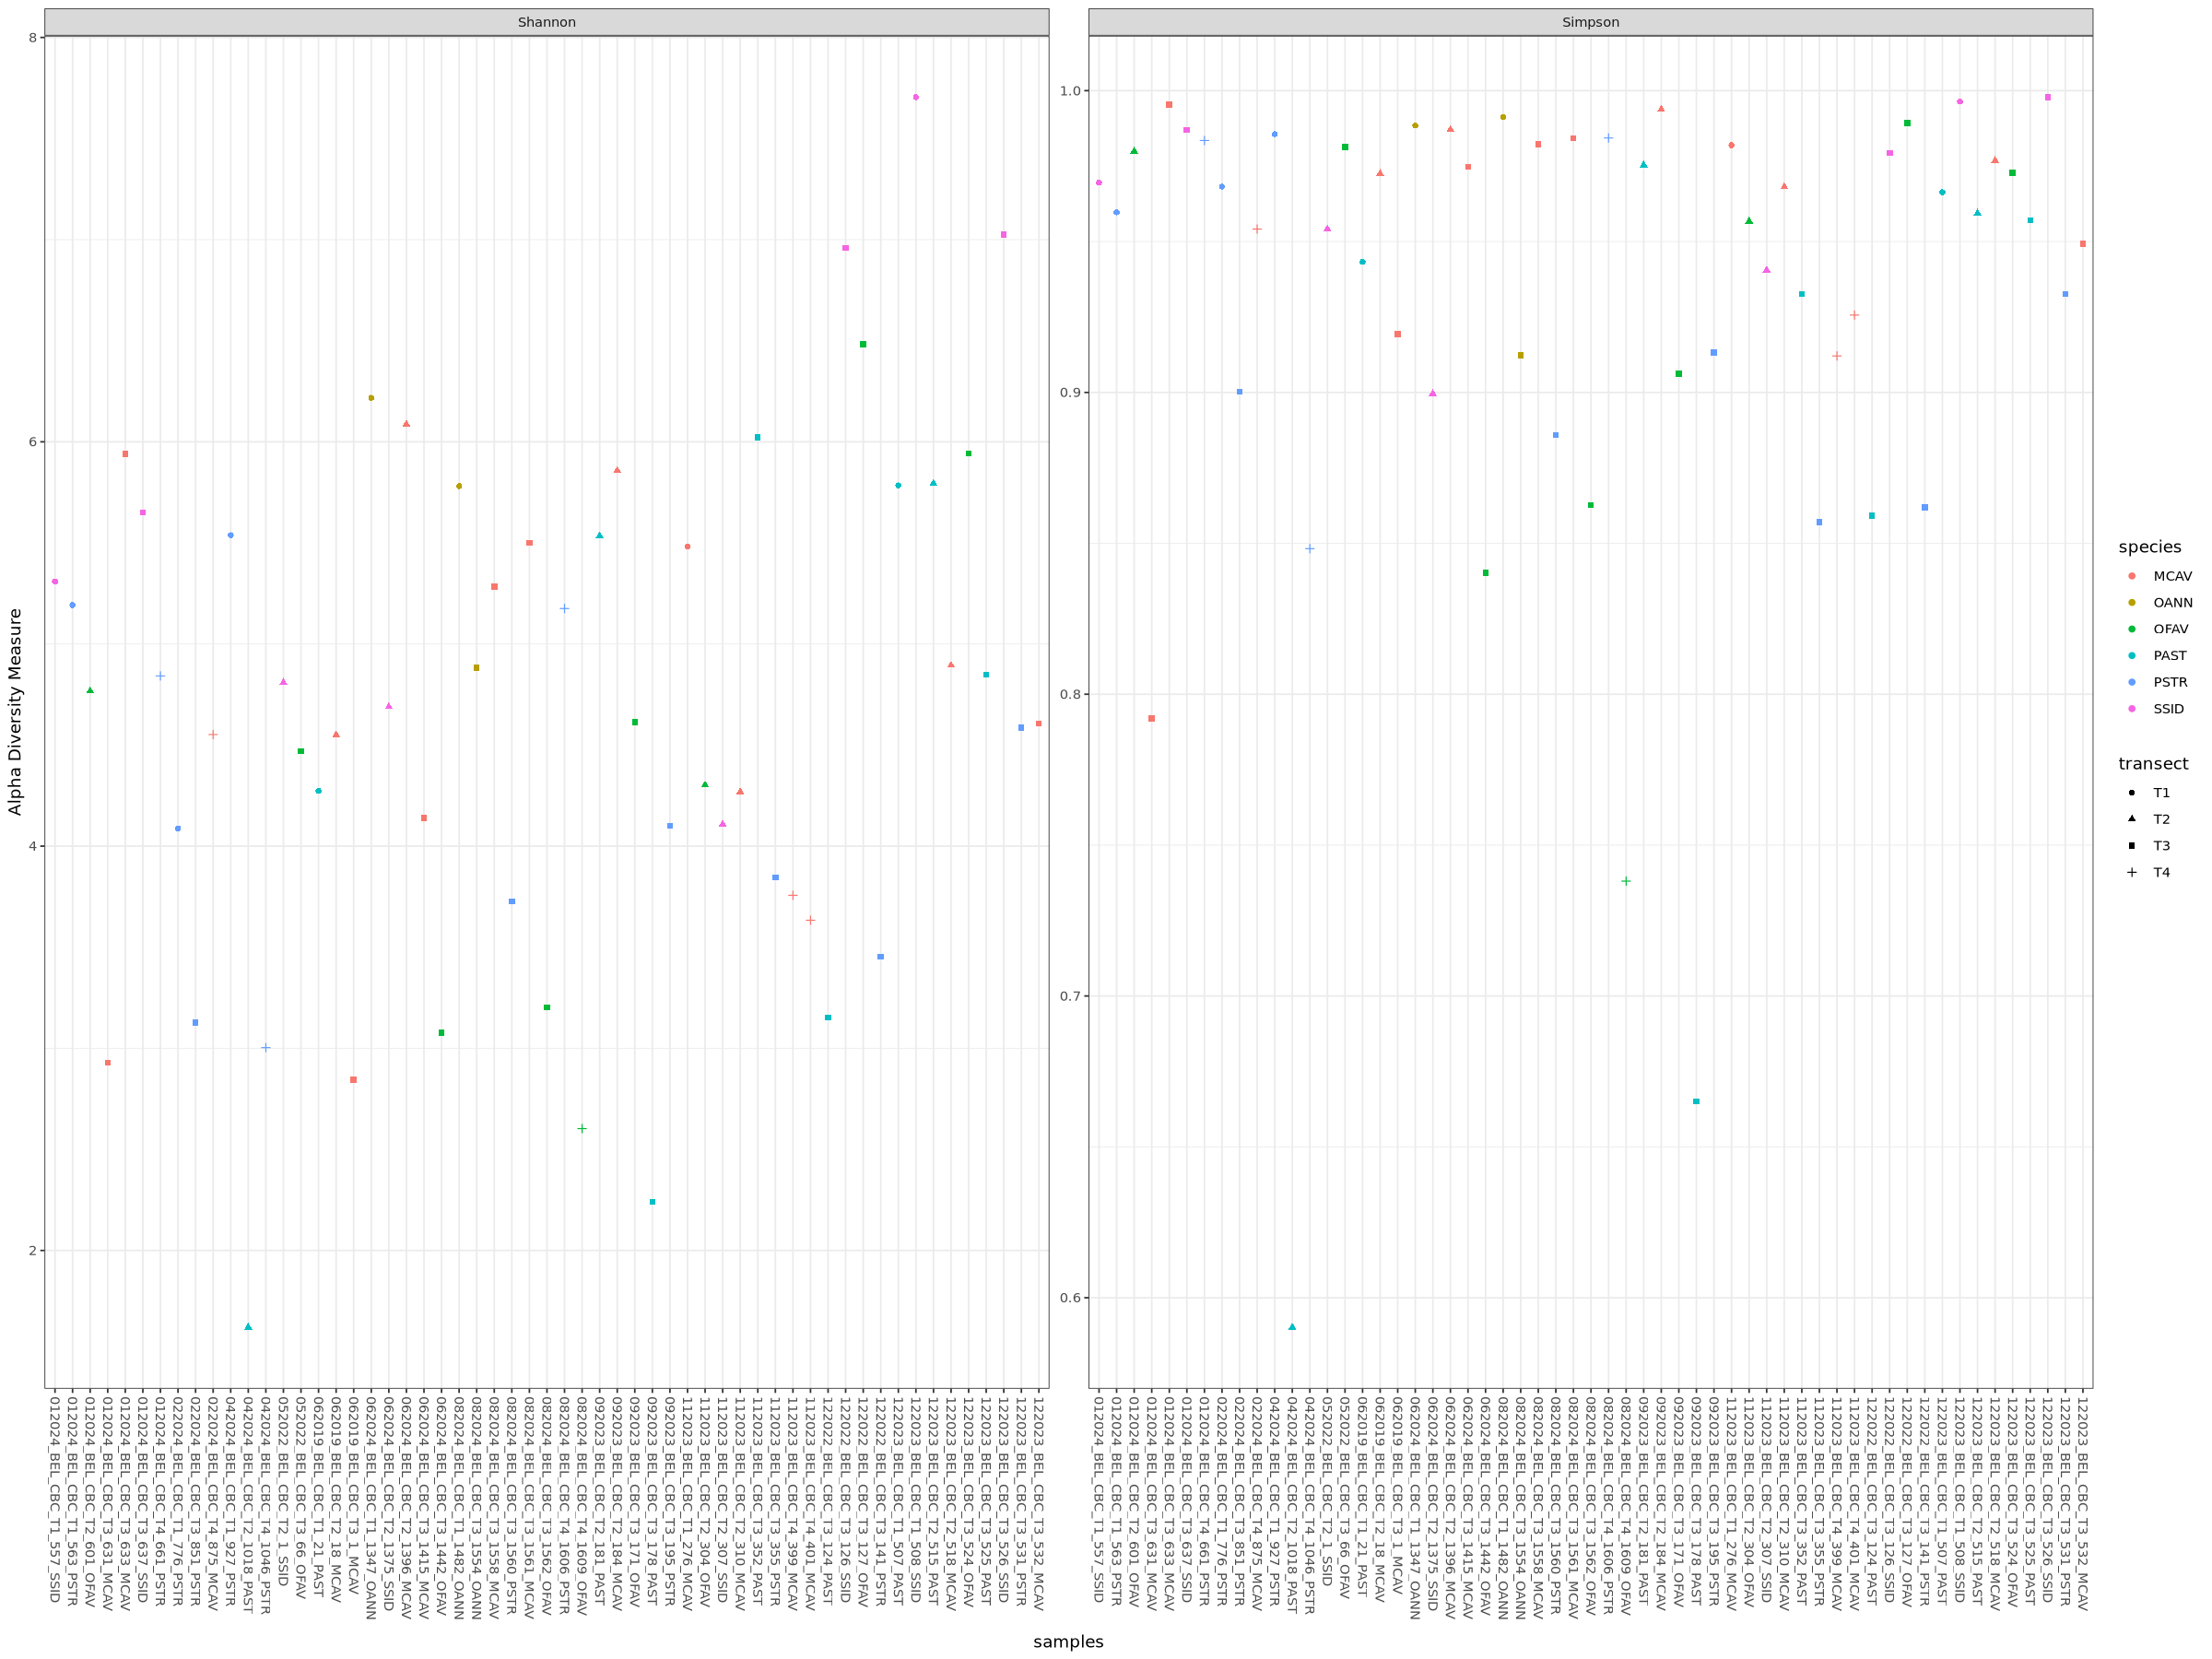

In [13]:
plot_richness(ps_norm, measures=c("Shannon", "Simpson"), color="species", shape="transect")

In [15]:
#ordination
ps_norm.ord <- ordinate(ps_norm, "NMDS", "bray", trymax=1000)
ps_norm.ord

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1198726 
Run 1 stress 0.1154917 
... New best solution
... Procrustes: rmse 0.05152227  max resid 0.1610795 
Run 2 stress 0.116311 
Run 3 stress 0.1423571 
Run 4 stress 0.1210521 
Run 5 stress 0.1317328 
Run 6 stress 0.1233672 
Run 7 stress 0.1327895 
Run 8 stress 0.1327931 
Run 9 stress 0.1154931 
... Procrustes: rmse 0.001376863  max resid 0.007507901 
... Similar to previous best
Run 10 stress 0.1230335 
Run 11 stress 0.1317327 
Run 12 stress 0.1163381 
Run 13 stress 0.1154917 
... New best solution
... Procrustes: rmse 5.711166e-05  max resid 0.0003390807 
... Similar to previous best
Run 14 stress 0.1397889 
Run 15 stress 0.1401662 
Run 16 stress 0.1205475 
Run 17 stress 0.121003 
Run 18 stress 0.1163381 
Run 19 stress 0.1423456 
Run 20 stress 0.1163449 
*** Best solution repeated 1 times


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”



Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, trymax = 1000) 

global Multidimensional Scaling using monoMDS

Data:     wisconsin(sqrt(veganifyOTU(physeq))) 
Distance: bray 

Dimensions: 2 
Stress:     0.1154917 
Stress type 1, weak ties
Best solution was repeated 1 time in 20 tries
The best solution was from try 13 (random start)
Scaling: centring, PC rotation 
Species: expanded scores based on ‘wisconsin(sqrt(veganifyOTU(physeq)))’ 


clustering on the x axis 
# find what is driving nmds 1
- the most variance is explained by the first component 
PCA analysis arrows with the length and direction

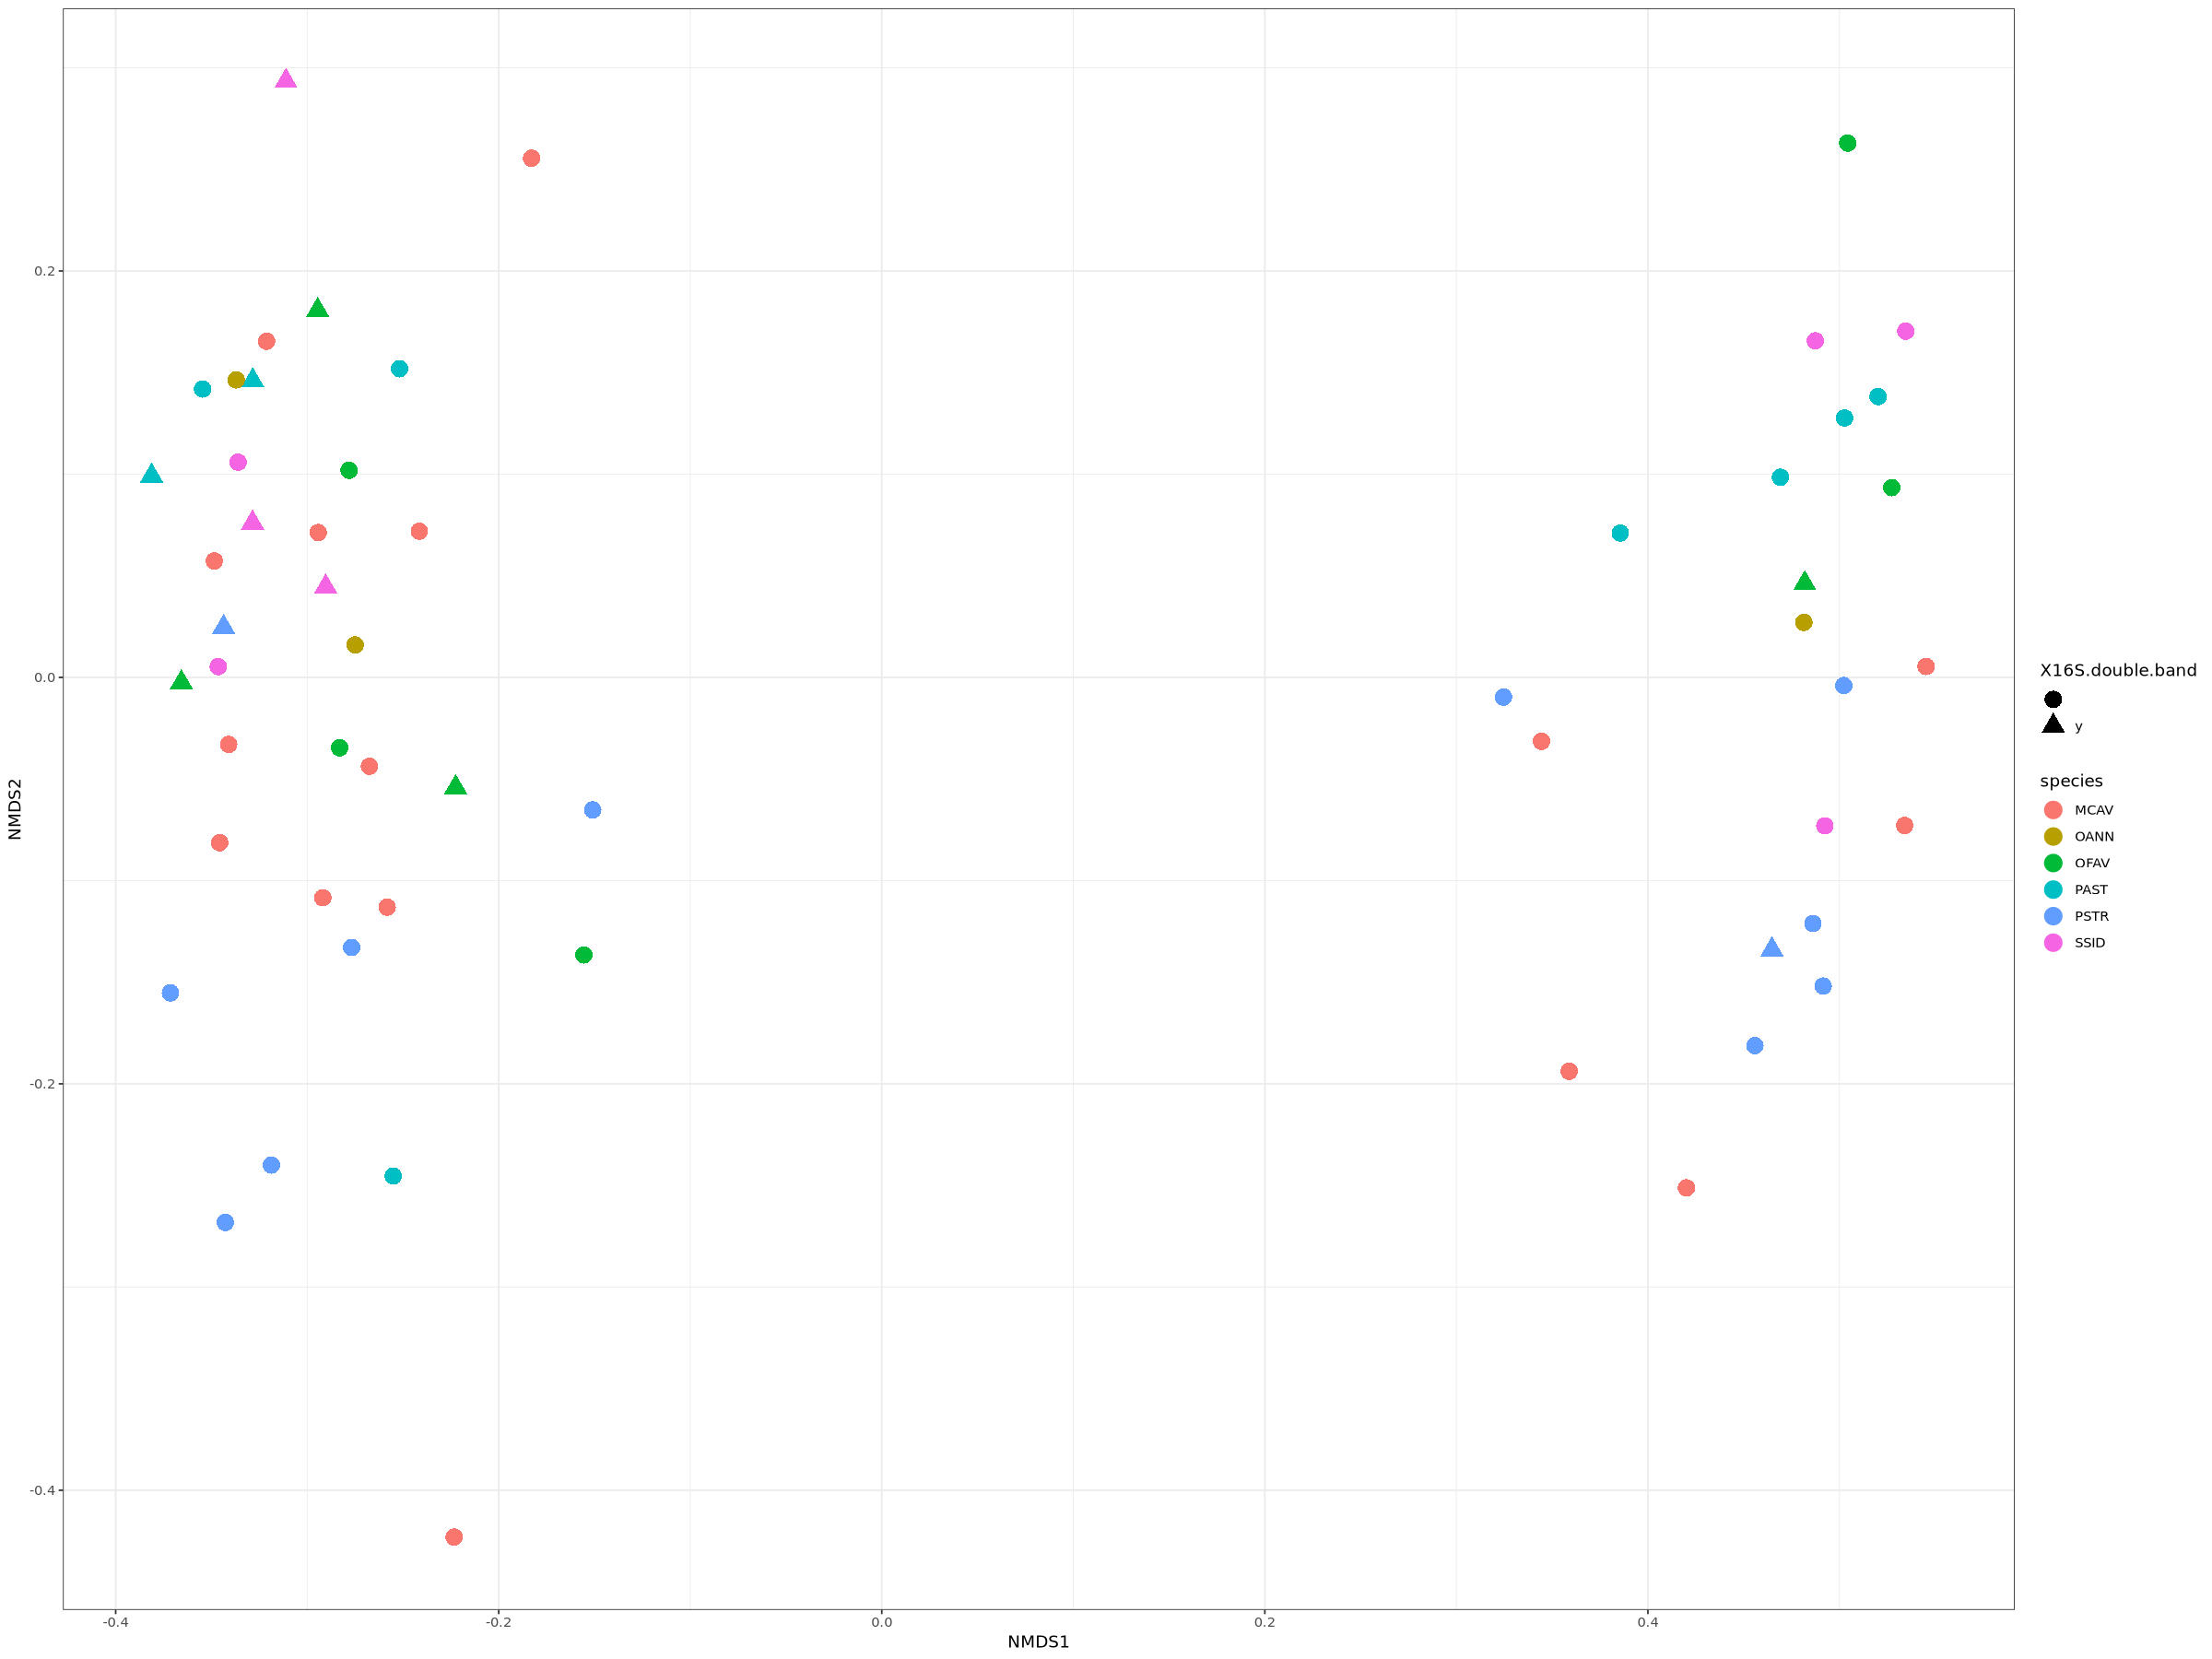

In [16]:
#plot ordination
plot_ordination(ps_norm, ps_norm.ord, type="samples", color="species", shape="X16S.double.band")+ 
geom_point(size=5)

# vegan time!
converting ps_norm to a usable state in vegan bc vegan can't read phyloseq objects, can only read separate df and matrices

In [18]:
# convert the sample_data() within a phyloseq object to a vegan compatible data object
pssd2veg <- function(ps_norm) {
  sd_veg <- sample_data(ps_norm)
  return(as(sd_veg,"data.frame"))
}

# convert the otu_table() within a phyloseq object to a vegan compatible data object
psotu2veg <- function(ps_norm) {
  otu_veg <- otu_table(ps_norm)
  if (taxa_are_rows(otu_veg)) {
    otu_veg <- t(otu_veg)
  }
  return(as(otu_veg, "matrix"))
}

In [21]:
# Extract normalized OTU matrix and sample data
otu_norm <- psotu2veg(ps_norm)
sample_norm <- pssd2veg(ps_norm)

# what does kmeans actually do?

In [22]:
#This number of clusters should be determined according to the context and goal of your analysis (so according to your expectations or hypotheses)
model <- kmeans(otu_norm, centers = 2)

#The output model$cluster specifies the group (i.e., 1 or 2) to which each sample belongs to.
print(model$cluster)

 012024_BEL_CBC_T1_557_SSID  012024_BEL_CBC_T1_563_PSTR 
                          2                           2 
 012024_BEL_CBC_T2_601_OFAV  012024_BEL_CBC_T3_631_MCAV 
                          2                           2 
 012024_BEL_CBC_T3_633_MCAV  012024_BEL_CBC_T3_637_SSID 
                          2                           2 
 012024_BEL_CBC_T4_661_PSTR  022024_BEL_CBC_T1_776_PSTR 
                          2                           2 
 022024_BEL_CBC_T3_851_PSTR  022024_BEL_CBC_T4_875_MCAV 
                          2                           2 
 042024_BEL_CBC_T1_927_PSTR 042024_BEL_CBC_T2_1018_PAST 
                          2                           1 
042024_BEL_CBC_T4_1046_PSTR    052022_BEL_CBC_T2_1_SSID 
                          2                           2 
  052022_BEL_CBC_T3_66_OFAV   062019_BEL_CBC_T1_21_PAST 
                          2                           2 
  062019_BEL_CBC_T2_18_MCAV    062019_BEL_CBC_T3_1_MCAV 
                          2    

calculate dissimilarity between samples using PERMANOVA in vegan

# df=n-1 

In [25]:
# variables with no interaction
adonis2(vegdist(otu_norm, method = "bray") ~ species + transect + date + X16S.double.band, data = sample_norm)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,5,3.9831860,0.15285356,1.8698214,0.001
transect,3,1.6302146,0.06255899,1.2754489,0.010
date,10,4.2151830,0.16175637,0.9893637,0.557
X16S.double.band,1,0.4664077,0.01789826,1.0947257,0.264
Residual,37,15.7638456,0.60493282,NA,NA
Total,56,26.0588368,1.00000000,NA,NA


In [26]:
#variables with 2-way and 3- way interaction
adonis2(vegdist(otu_norm, method = "bray") ~ species * transect * X16S.double.band, data = sample_norm)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,5,3.9831860,0.15285356,1.9855993,0.001
transect,3,1.6302146,0.06255899,1.3544237,0.010
X16S.double.band,1,0.5432414,0.02084673,1.3540164,0.038
species:transect,9,4.5981465,0.17645248,1.2734190,0.001
species:X16S.double.band,3,1.1638043,0.04466064,0.9669181,0.616
transect:X16S.double.band,3,1.2878493,0.04942083,1.0699779,0.218
species:transect:X16S.double.band,1,0.4149643,0.01592413,1.0342885,0.389
Residual,31,12.4374306,0.47728264,NA,NA
Total,56,26.0588368,1.00000000,NA,NA


this specific code tests how much of the variation in Bray-Curtis distances can be explained by the combination of Experiment and Species, treating Species as nested within Experiment.
#adonis2(vegdist(otu_norm, method="bray") ~ Experiment/Species, data=sample_norm)


In [27]:
#variables nested within eachother
#this one is species within transect with date as another variable
adonis2(vegdist(otu_norm, method = "bray") ~ transect/species + date, data = sample_norm)


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
transect,3,1.820054,0.06984401,1.499027,0.001
date,10,4.563316,0.17511589,1.127527,0.044
transect:species,14,7.938619,0.30464212,1.401082,0.001
Residual,29,11.736848,0.45039798,NA,NA
Total,56,26.058837,1.00000000,NA,NA


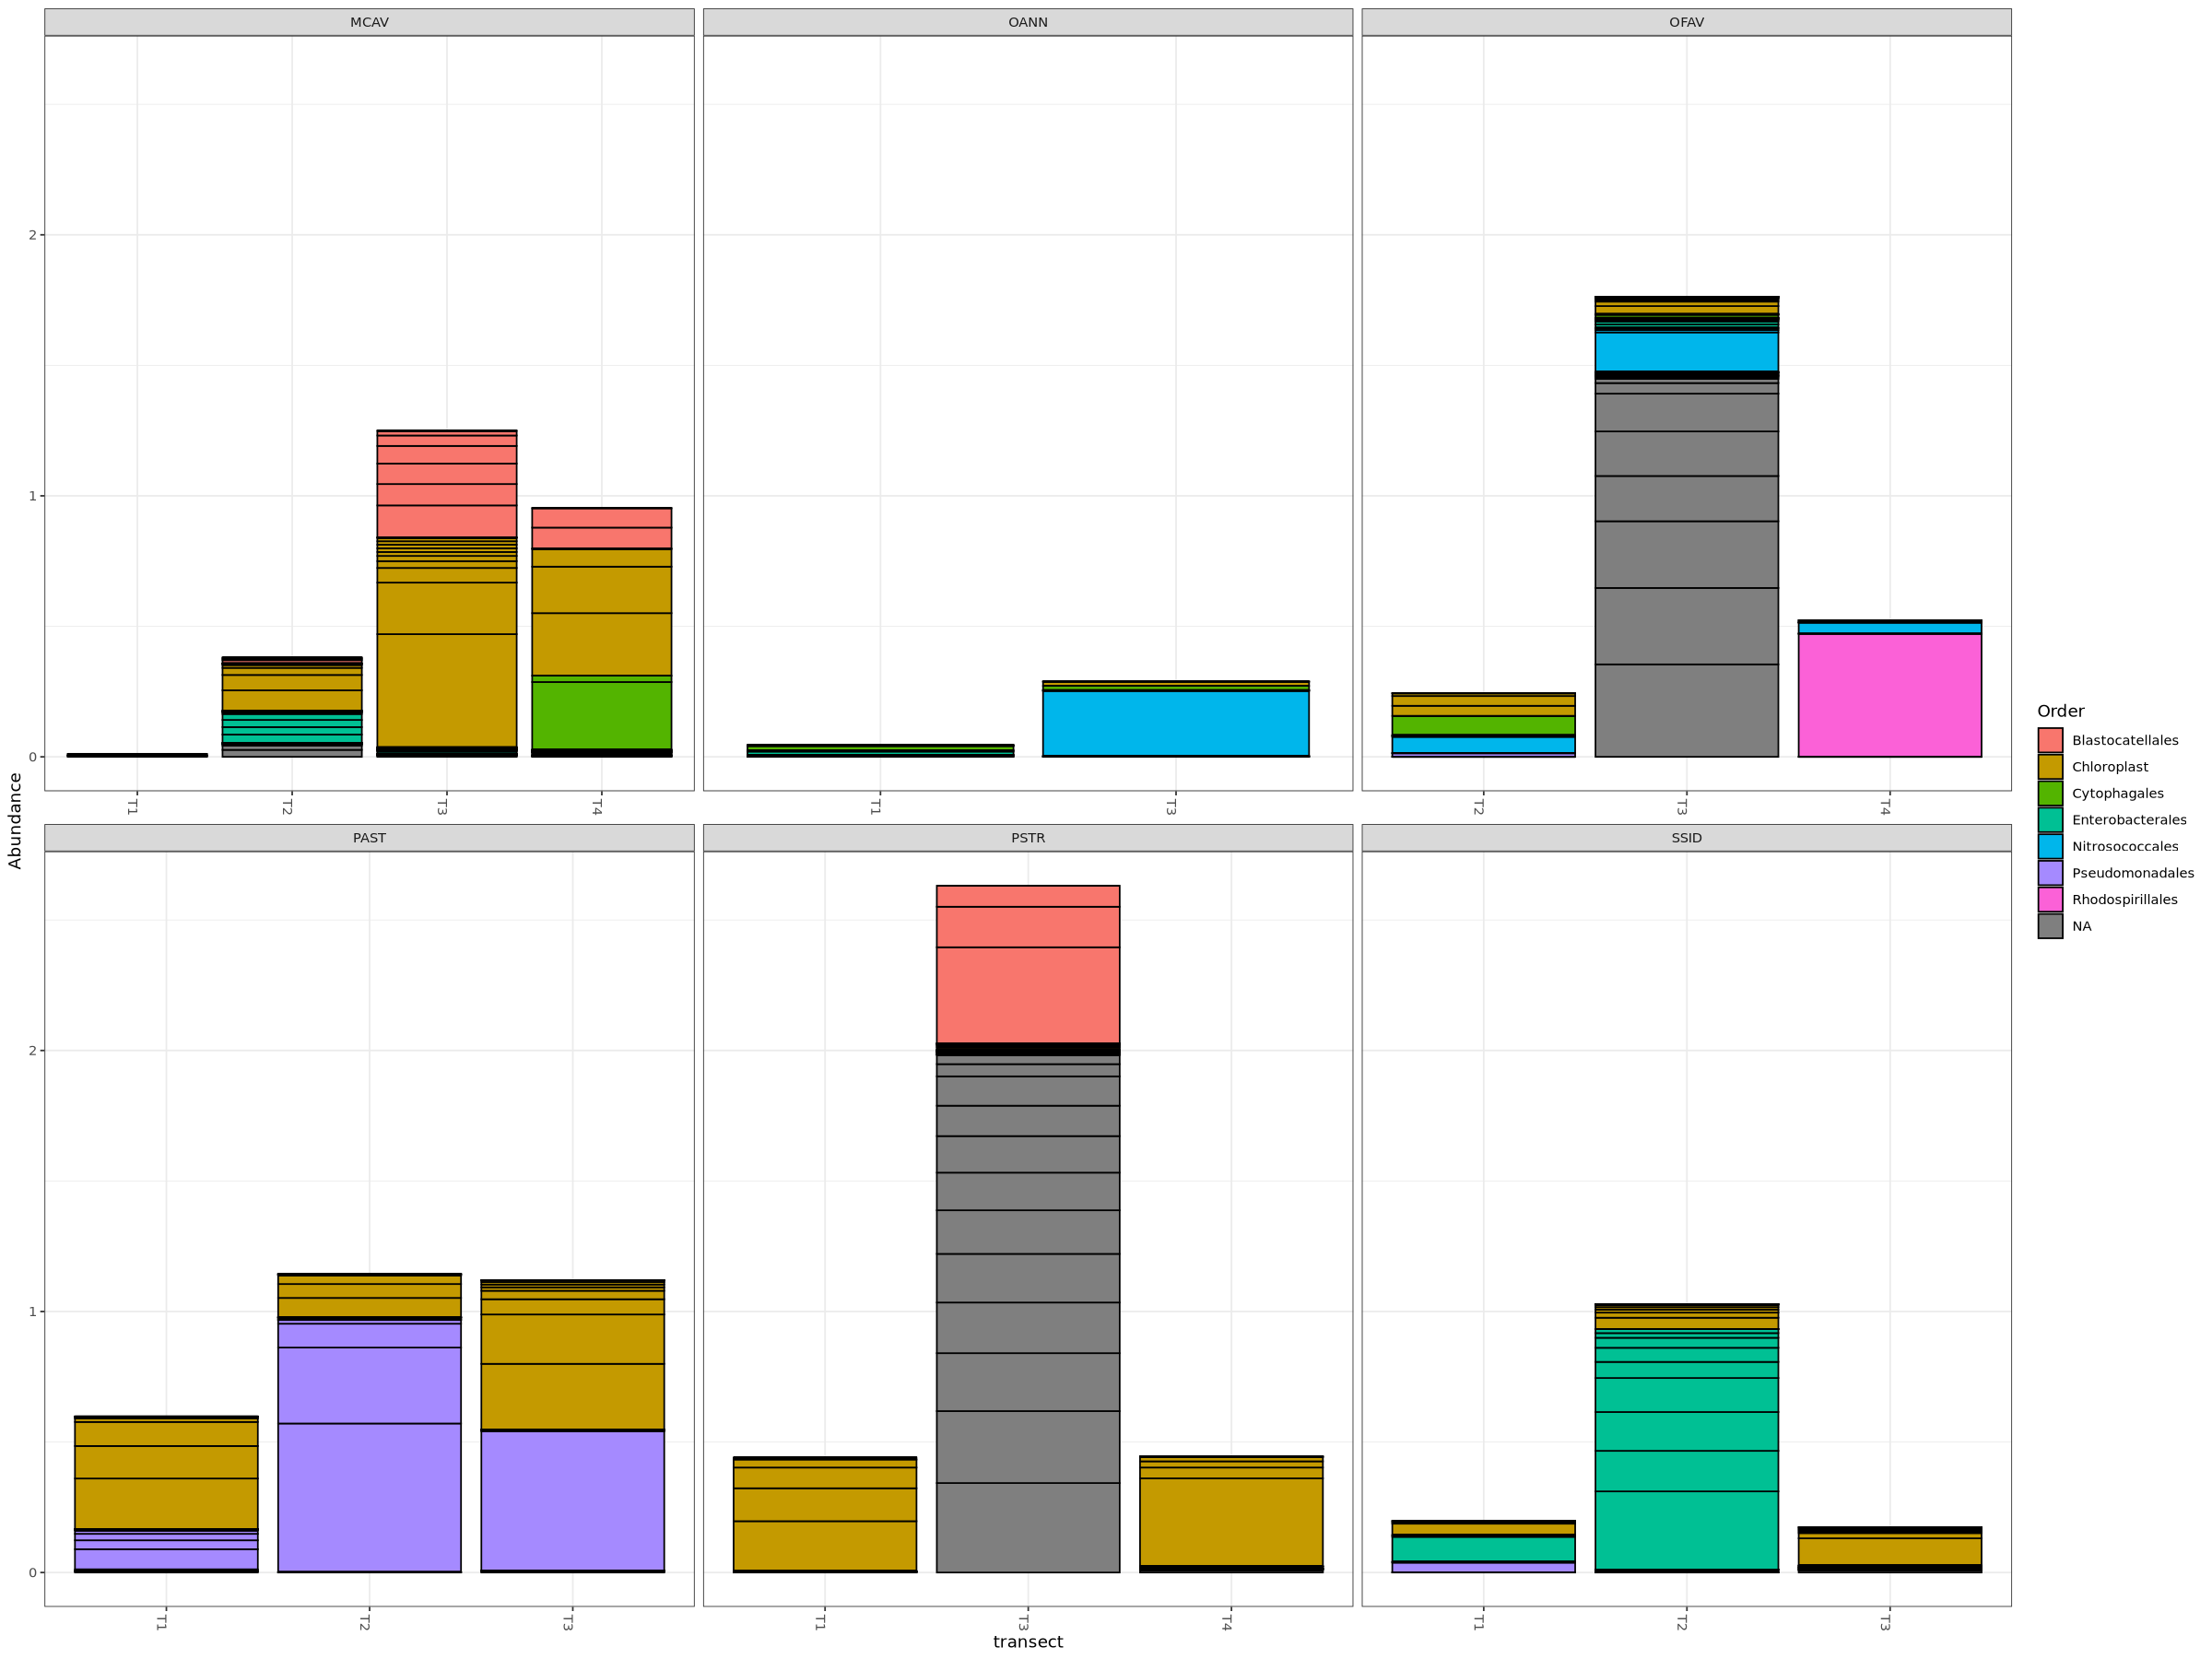

In [29]:
top20 <- names(sort(taxa_sums(ps_norm), decreasing=TRUE))[1:20] 
ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top20 <- prune_taxa(top20, ps.top20) 
plot_bar(ps.top20, x="transect", fill="Order") + facet_wrap(~species, scales="free_x")

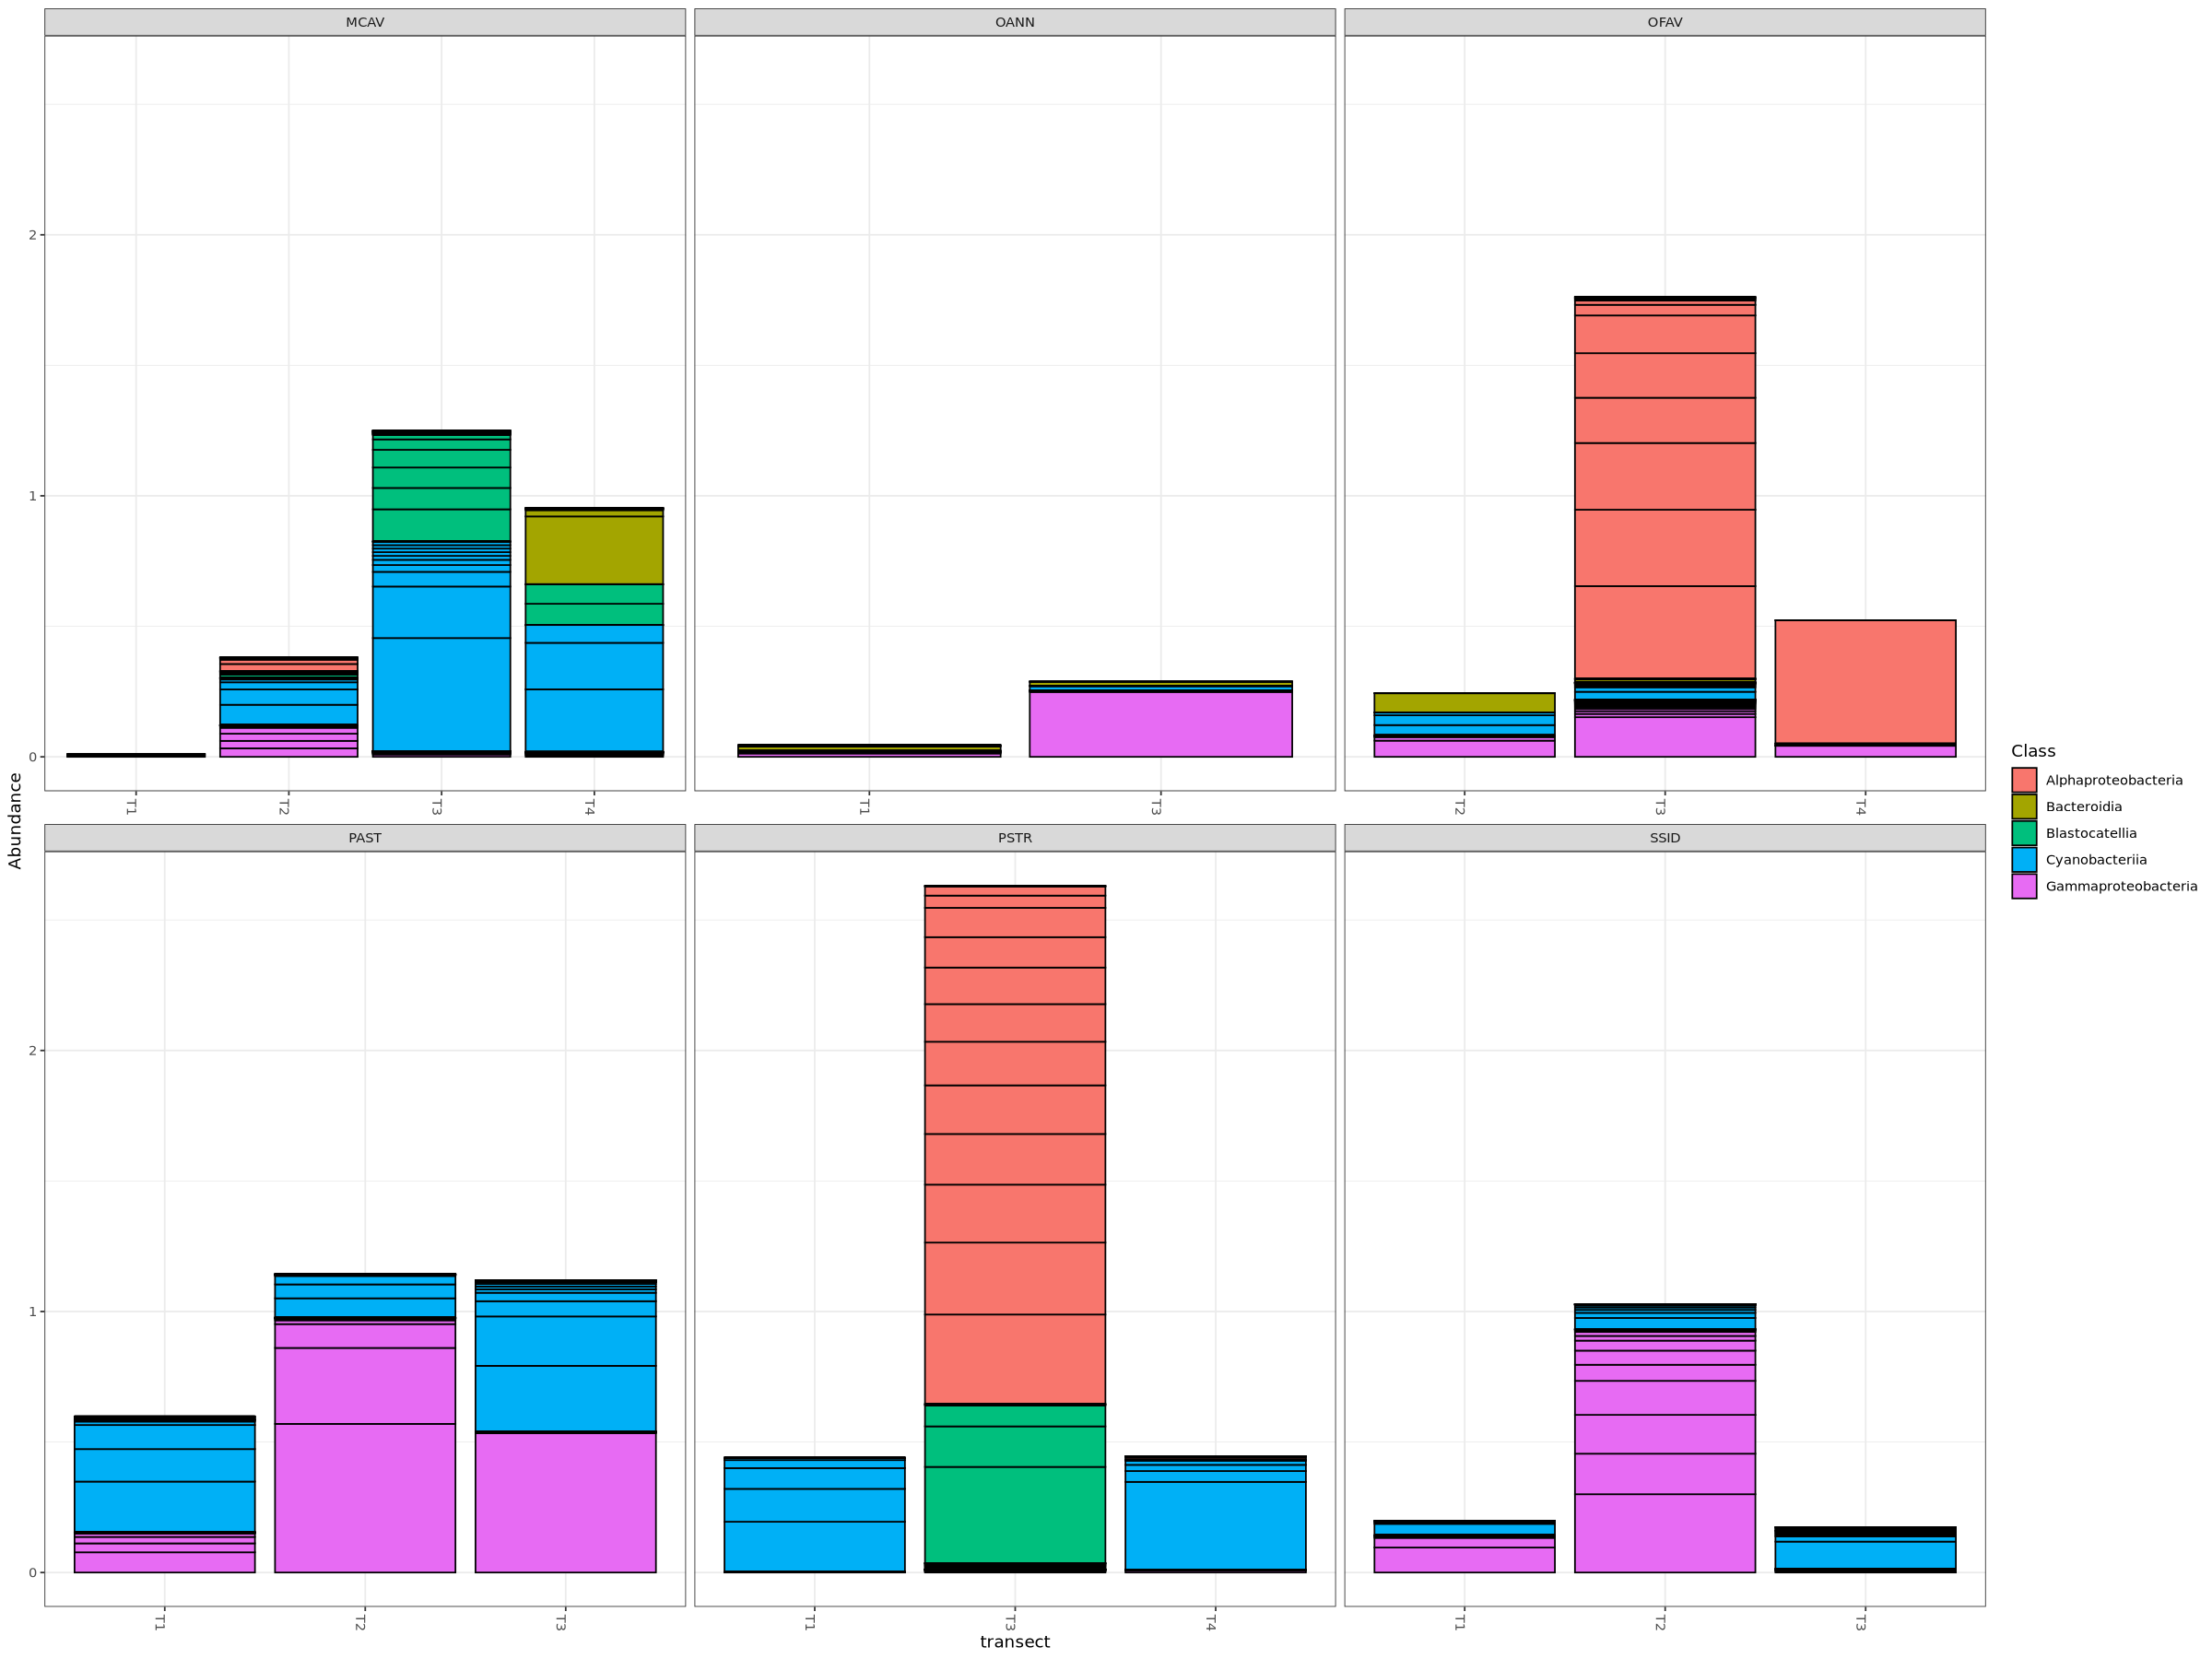

In [28]:
top20 <- names(sort(taxa_sums(ps_norm), decreasing=TRUE))[1:20] 
ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top20 <- prune_taxa(top20, ps.top20) 
plot_bar(ps.top20, x="transect", fill="Class") + facet_wrap(~species, scales="free_x")